In [82]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

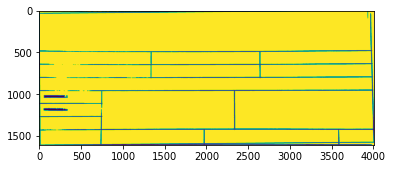

In [83]:
img = cv2.imread("../table.jpg", 0)
plt.imshow(img)

In [84]:
img.shape

(1607, 4010)

In [85]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

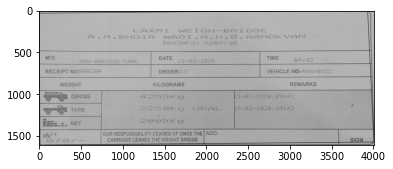

In [86]:
bin_img = cv2.imread("../sample_cropped.jpg")
plt.imshow(bin_img)

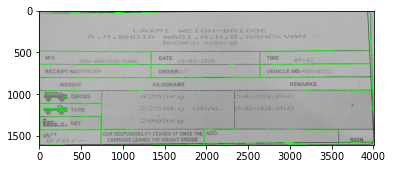

In [87]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(bin_img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
cv2.imwrite("test.jpg", image)
plotting = plt.imshow(image)
plt.show()

In [88]:
len(box)

3327

In [89]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])

In [90]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [91]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

In [92]:
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

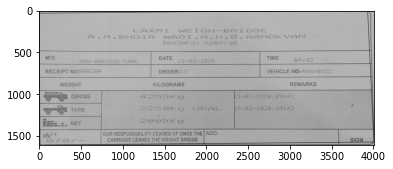

In [93]:
bin_img = cv2.imread("../sample_cropped.jpg")
plt.imshow(bin_img)

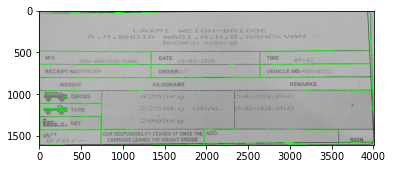

In [94]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
no = 1
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=""
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                if (w*h > 5000):
                    crop = bin_img[x:x+h, y:y+w]
                    cv2.imwrite("{}.jpg".format(str(no)), crop)
                    no += 1
                image = cv2.rectangle(bin_img,(y,x),(y+w, x+h),(0,255,0),2)
plt.imshow(image)

In [95]:
cv2.imwrite("../cells.jpg", image)

True

# Alternate approach

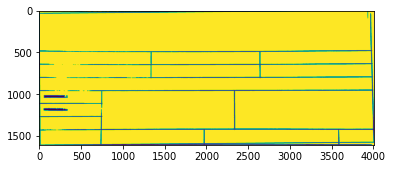

In [96]:
plt.imshow(img)

In [97]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img, connectivity=8, ltype=cv2.CV_32S)

In [98]:
### lets visualise the connected component image using the function

def imshow_components(labels):
    ### creating a hsv image, with a unique hue value for each label
    label_hue = np.uint8(179*labels/np.max(labels))
    ### making saturation and volume to be 255
    empty_channel = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, empty_channel, empty_channel])
    ### converting the hsv image to BGR image
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    ### returning the color image for visualising Connected Componenets
    return labeled_img

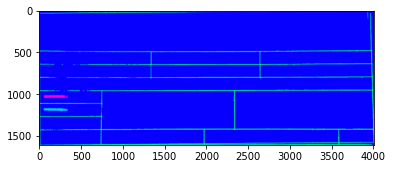

In [99]:
out_image=imshow_components(~labels)
plt.imshow(out_image)